In [2]:
!pip install mnist keras

In [3]:
import numpy as np
import mnist
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)
print(train_images.shape) # (60000, 28, 28, 1)
print(test_images.shape)  # (10000, 28, 28, 1)



(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
num = 50000

In [5]:
print(train_images[num])

[[[-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]]

 [[-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]]

 [[-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-0.5       ]
  [-

In [6]:
print(train_labels[num])

3


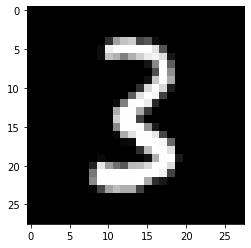

In [7]:
first_image = train_images[num]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [9]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [10]:
from keras.utils import to_categorical

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  validation_data=(test_images, to_categorical(test_labels)),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.3398 - accuracy: 0.9007 - val_loss: 0.1881 - val_accuracy: 0.9463
Epoch 2/10
60000/60000 [==============================] - 21s 342us/step - loss: 0.1538 - accuracy: 0.9567 - val_loss: 0.1279 - val_accuracy: 0.9631
Epoch 3/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.1141 - accuracy: 0.9677 - val_loss: 0.1011 - val_accuracy: 0.9675
Epoch 4/10
60000/60000 [==============================] - 21s 355us/step - loss: 0.0948 - accuracy: 0.9728 - val_loss: 0.0884 - val_accuracy: 0.9734
Epoch 5/10
60000/60000 [==============================] - 23s 386us/step - loss: 0.0829 - accuracy: 0.9761 - val_loss: 0.0861 - val_accuracy: 0.9724
Epoch 6/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0744 - accuracy: 0.9779 - val_loss: 0.0755 - val_accuracy: 0.9757
Epoch 7/10
60000/60000 [==============================] 

In [11]:
model.save_weights('cnn.h5')

In [12]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# num_filters = 8
# filter_size = 3
# pool_size = 2

# # Build the model.
# model = Sequential([
#   Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
#   MaxPooling2D(pool_size=pool_size),
#   Flatten(),
#   Dense(10, activation='softmax'),
# ])

# # Load the model's saved weights.
# model.load_weights('cnn.h5')

In [13]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


In [14]:
# try some custom images

filepath = "../Images/test.png"

In [15]:
from tensorflow.keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

FileNotFoundError: [Errno 2] No such file or directory: '../Images/test.png'